In [1]:
import numpy as np
import seaborn as sns
import scipy
import skimage
sns.set_style("ticks")
from pathlib import Path

# Get the data 

In [2]:
# in this file is the url to the spreadsheet with the data
# PIGLEG_SPREADSHEET_URL=https://docs.google.com/spreadsheets/d/1G55kXxcJ0...piLaK0snddRU-jzU/edit?usp=sharing
env_paths = list(Path(".").glob("../**/.env.dev"))
print(env_paths)
# find line with PIGLEG_SPREADSHEET_URL and give me the value after the "="
PIGLEG_SPREADSHEET_URL = [line.split("=", 1)[1].strip() for line in open(env_paths[0], "r") if line.startswith("PIGLEG_SPREADSHEET_URL")][0]
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("\"", "")
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("edit?usp=sharing", "export?format=csv")
# PIGLEG_SPREADSHEET_URL

[WindowsPath('../.env.dev')]


In [3]:
import pandas as pd
url = PIGLEG_SPREADSHEET_URL
df = pd.read_csv(url)

C:\Users\Jirik\AppData\Local\Temp\ipykernel_53824\795014733.py:3: DtypeWarning: Columns (21,22,25,31,32,33,35,36,37,38,39,40,42,43,44,45,46,47,48,49,52,58,70,71,81,84,88,89,90,91,92,93,94,95,96,115,116,117,118,119,120,127,157,177,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,237,238,239,240,241,242,254,260,262,273,274,275,276,277,278,285,286,287,288,289,290,296,302,315,316,317,318,319,320,326,327,328,329,330,331,332,333,334,335,336,337,339,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,366,367,368,369,370,371,372,373,375,376,377,378,379,380,381,382,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,485,486,487,488,489,490,491,492,493,494,495,496,497,500,501,503,504,505,506,507,508,509,510,511,513,514,515,516,517,518,520,521,522,523,524,525,526,528,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,55

In [4]:
df.tail()

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,Forceps knot 0 velocity,Forceps knot 0 unit,Forceps knot 0 visibility [%],Scissors knot 0 area presence [%],Scissors knot 0 median area presence [%],Scissors knot 0 length [m],Scissors knot 0 visibility [s],Scissors knot 0 velocity,Scissors knot 0 unit,Scissors knot 0 visibility [%]
2449,Medium-Schweinefu_.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-25 09:18:23,Khalatbari.sadaf@gmail.com,2022-08-01 09:18,2024-06-24 01:31,25.0,"3,351296683","0,1740994217","0,4751171965",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2450,Medium-RPReplay_Final1634048018.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-25 09:19:01,Khalatbari.sadaf@gmail.com,2022-08-01 09:14,2024-06-24 01:30,25.0,"3,842705325","0,2265904529","0,7560492029",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2451,Fehringer_Pascal__post_test.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-25 09:20:58,mjirik@kky.zcu.cz,2024-06-03 10:53,2024-06-25 07:20,25.0,NaN,NaN,NaN,...,"0,009159508019",m,"10,89430894",0,0,"0,08068684724","77,8","0,001037995462",m,"94,87804878"
2452,Medium-Schweinefu_.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-25 09:21:41,Khalatbari.sadaf@gmail.com,2022-08-01 09:18,2024-06-25 07:21,25.0,NaN,NaN,NaN,...,"0,02610480329",m,"9,182389937","78,26086957","82,60869565","0,1740994217","1,533333333","0,003607121583",m,"1,446540881"
2453,Medium-RPReplay_Final1634048018.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-25 09:23:25,Khalatbari.sadaf@gmail.com,2022-08-01 09:14,2024-06-25 07:23,25.0,NaN,NaN,NaN,...,"0,01072503628",m,"28,59649123","65,47619048","98,80952381","0,2265904529","5,6","0,008402199709",m,"3,684210526"


In [5]:
df.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'Forceps knot 0 velocity', 'Forceps knot 0 unit',
       'Forceps knot 0 visibility [%]', 'Scissors knot 0 area presence [%]',
       'Scissors knot 0 median area presence [%]',
       'Scissors knot 0 length [m]', 'Scissors knot 0 visibility [s]',
       'Scissors knot 0 velocity', 'Scissors knot 0 unit',
       'Scissors knot 0 visibility [%]'],
      dtype='object', length=614)

In [6]:
## Select data

In [7]:
filename_contains_list=[
    "Angelique Runkel _Pretest.mp4", #B
    "Angelique Runkel_Posttest.mp4",
    "Aryan DadashzadehKhayyat_Pretest.mp4", #B
    "Aryan DadashzadehKhayat_Posttest.mp4",
    "Fehringer_Pascal__pre_test.mp4", #
    "Fehringer_Pascal__post_test.mp4",
    "Fischer_Tom_Pretest.mp4", #B
    "Fischer_Tom-Posttest.mp4", #B
    "Gehrke,Yves-Pretest.mp4", #B
    "Gehrke,Yves - post.mp4",
    "Glöß, Monique, Pretest 1-11.10.2021.mp4",
    "Glöß, Monique_Posttest.mp4",
    "Gremme_YvonnePretest1_11_10_2021.mp4", #B
    "Gremme_Yvonne_Posttest.mp4",
    "Große Nina__Pretest___11_10_2021.mp4", #B
    "Große, Nina - Posttest.mp4",
    "Hilger,Anke-Pretest1.mp4",
    "Hilger,Anke-Posttest.mp4",
    "Huster__Janik___Pre_Test.mp4", #B
    "Huster__Janik_-_Post-Test.mp4",
    "Jonas Marx_Pretest.mp4",
    "Jonas Marx_Posttest.mp4",
    "Kraus__Caroline_PreTest1.mp4", #B
    "Kraus_Caroline_PostTest.mp4",
    "Laura Bütow_Pretest.mp4", #B
    "Laura Bütow_Posttest.mp4",
    "Lausch_Laura_Pretest.mp4",
    "Lausch_Laura-Posttest.mp4",
    "Mader_Pretest.mp4", #B
    "Mader_Posttest.mp4",
    "Neitzel_Natalie_Pretest1.mp4",
    "Neitzel_Natalie_Posttest.mp4",
    "Porthaus, Michael_Pretest1_11_10_2021.mp4", #B
    "Porthaus, Michael-Posttest.mp4",
    "Pre_-Test_Isabel_Linden.mp4",
    "Post_-Test_Isabel_Linden.mp4",
    "Sarah Grimm PreTest1.mp4",
    "Sarah Grimm post.mp4",
    "Scheufler, Rebekka__Pretest_1__11_10_21.mp4", #
    "Scheufler, Rebekka-Posttest.mp4", #
    "Schiesser_David_pre_test.mp4",
    "Schiesser_David_post_test.mp4",
    "Spitze_Vanessa_PreTest.mp4", #B
    "Spitze_Vanessa post.mp4",
    "Volkers_Pr_Test1.mp4",
    "Volkers post.mp4",
]

In [8]:
# remove all records with filename NA or NaN
dfs = df[df["filename"].notna()]
dfs = dfs.copy()
print(len(dfs))

# take all records with filename containing "Good", "Medium", "Bad", if the filename is the same, take the last one

# dfs = dfs[dfs["filename"].str.contains("Good|Medium|Bad")].drop_duplicates(subset=["filename"], keep="last")

# take the records uploaded after 2024-02-01
# uploaded_at to datetime
dfs["uploaded_at"] = pd.to_datetime(dfs["uploaded_at"])
dfs["timestamp"] = pd.to_datetime(dfs["timestamp"])
# dfs = dfs[dfs["uploaded_at"] > "2024-02-01"]
dfs = dfs[dfs["timestamp"] > "2024-05-23 22:19:59"]

# dfs = dfs[dfs["filename"].str.contains("Einzelknopfnaht")].drop_duplicates(subset=["filename"], keep="last")
dfs = dfs[dfs["filename"].str.contains("|".join(filename_contains_list))].drop_duplicates(subset=["filename"], keep="last")


print(len(dfs))
dfs["filename"]

2454
46


2125                 Fehringer_Pascal__pre_test.mp4
2130                        Laura Bütow_Pretest.mp4
2132                  Angelique Runkel _Pretest.mp4
2135                              Mader_Pretest.mp4
2142                Scheufler, Rebekka-Posttest.mp4
2145                   Huster__Janik___Pre_Test.mp4
2146                        Gehrke,Yves-Pretest.mp4
2147                     Große, Nina - Posttest.mp4
2150           Aryan DadashzadehKhayyat_Pretest.mp4
2153           Gremme_YvonnePretest1_11_10_2021.mp4
2155                       Fischer_Tom-Posttest.mp4
2160                     Spitze_Vanessa_PreTest.mp4
2161                        Fischer_Tom_Pretest.mp4
2164           Große Nina__Pretest___11_10_2021.mp4
2178      Porthaus, Michael_Pretest1_11_10_2021.mp4
2181    Scheufler, Rebekka__Pretest_1__11_10_21.mp4
2182                   Kraus__Caroline_PreTest1.mp4
2193           Aryan DadashzadehKhayat_Posttest.mp4
2198                     Glöß, Monique_Posttest.mp4
2200        

In [224]:
pre_post_col = []
for i, filename in enumerate(filename_contains_list):
    # if odd number it is "pretest" if even number it is "posttest"
    
    if i % 2 == 0:
        val = "pretest"
    else:
        val = "posttest"
    pre_post_col.append(val)
    print(f"{val}: {filename}")

pre_post_dict = {filename: val for filename, val in zip(filename_contains_list, pre_post_col)}
dfs["is_pretest_num"] = dfs["filename"].apply(lambda x: pre_post_dict[x] == "pretest").astype(int)

dfs_all = dfs.copy()


pretest: Angelique Runkel _Pretest.mp4
posttest: Angelique Runkel_Posttest.mp4
pretest: Aryan DadashzadehKhayyat_Pretest.mp4
posttest: Aryan DadashzadehKhayat_Posttest.mp4
pretest: Fehringer_Pascal__pre_test.mp4
posttest: Fehringer_Pascal__post_test.mp4
pretest: Fischer_Tom_Pretest.mp4
posttest: Fischer_Tom-Posttest.mp4
pretest: Gehrke,Yves-Pretest.mp4
posttest: Gehrke,Yves - post.mp4
pretest: Glöß, Monique, Pretest 1-11.10.2021.mp4
posttest: Glöß, Monique_Posttest.mp4
pretest: Gremme_YvonnePretest1_11_10_2021.mp4
posttest: Gremme_Yvonne_Posttest.mp4
pretest: Große Nina__Pretest___11_10_2021.mp4
posttest: Große, Nina - Posttest.mp4
pretest: Hilger,Anke-Pretest1.mp4
posttest: Hilger,Anke-Posttest.mp4
pretest: Huster__Janik___Pre_Test.mp4
posttest: Huster__Janik_-_Post-Test.mp4
pretest: Jonas Marx_Pretest.mp4
posttest: Jonas Marx_Posttest.mp4
pretest: Kraus__Caroline_PreTest1.mp4
posttest: Kraus_Caroline_PostTest.mp4
pretest: Laura Bütow_Pretest.mp4
posttest: Laura Bütow_Posttest.mp4
pre

In [225]:
# go over dfs and add column "pretest_posttest" with value "pretest" or "posttest" accoarding to the filename

# dfs["pretest_posttest"] = dfs["filename"].apply(lambda x: pre_post_dict[x])
# dfs["is_pretest"] = dfs["pretest_posttest"] == "pretest"
# dfs["is_pretest_num"] = dfs["is_pretest"].astype(int)

## Check annotations with not good tracking and remove them from the data

In [226]:
dfs[~dfs["annotation_annotation_annotation"].str.contains("tracking_ok|tracking OK|trackink_ok")][["filename", "annotation_annotation_annotation"]]


,filename,annotation_annotation_annotation
2125,Fehringer_Pascal__pre_test.mp4,00:00:08 stitch_start\r\n00:01:37 stitch_end\r...
2130,Laura Bütow_Pretest.mp4,00:02:21 stitch_start\r\n00:04:30 stitch_end\r...
2132,Angelique Runkel _Pretest.mp4,00:00:02 stitch_start \r\n00:01:01 stitch_end ...
2135,Mader_Pretest.mp4,00:00:25 stitch_start\r\n00:04:05 stitch_end\r...
2142,"Scheufler, Rebekka-Posttest.mp4",00:00:21 stitch_start\r\nnok different type of...
2145,Huster__Janik___Pre_Test.mp4,00:01:31 stitch_start\r\nfirst stitch is not f...
2146,"Gehrke,Yves-Pretest.mp4",00:00:33 stitch_start \r\n00:02:36 stitch_end\...
2150,Aryan DadashzadehKhayyat_Pretest.mp4,00:00:00 stitch_start\r\n00:01:53 stitch_end\r...
2153,Gremme_YvonnePretest1_11_10_2021.mp4,00:00:16 stitch_start\r\nNOK
2155,Fischer_Tom-Posttest.mp4,00:00:02 stitch_start\r\n00:01:08 stitch_end\r...


In [311]:
filename_contains_list_ok=[
    # "Angelique Runkel _Pretest.mp4", #B
    "Angelique Runkel_Posttest.mp4",
    # "Aryan DadashzadehKhayyat_Pretest.mp4", #B
    "Aryan DadashzadehKhayat_Posttest.mp4",
    # "Fehringer_Pascal__pre_test.mp4", #B
    "Fehringer_Pascal__post_test.mp4",
    # "Fischer_Tom_Pretest.mp4", #B
    # "Fischer_Tom-Posttest.mp4", #B
    # "Gehrke,Yves-Pretest.mp4", #B
    "Gehrke,Yves - post.mp4",
    "Glöß, Monique, Pretest 1-11.10.2021.mp4",
    "Glöß, Monique_Posttest.mp4",
    # "Gremme_YvonnePretest1_11_10_2021.mp4", #B
    # "Gremme_Yvonne_Posttest.mp4",
    # "Große Nina__Pretest___11_10_2021.mp4", #B
    "Große, Nina - Posttest.mp4",
    "Hilger,Anke-Pretest1.mp4",
    "Hilger,Anke-Posttest.mp4",
    # "Huster__Janik___Pre_Test.mp4", #B
    "Huster__Janik_-_Post-Test.mp4",
    "Jonas Marx_Pretest.mp4",
    "Jonas Marx_Posttest.mp4",
    # "Kraus__Caroline_PreTest1.mp4", #B
    "Kraus_Caroline_PostTest.mp4",
    # "Laura Bütow_Pretest.mp4", #B
    "Laura Bütow_Posttest.mp4",
    "Lausch_Laura_Pretest.mp4",
    "Lausch_Laura-Posttest.mp4",
    # "Mader_Pretest.mp4", #B
    "Mader_Posttest.mp4",
    # "Neitzel_Natalie_Pretest1.mp4", # missing qr code for pixelsize, scisors qr code is present
    "Neitzel_Natalie_Posttest.mp4",
    # "Porthaus, Michael_Pretest1_11_10_2021.mp4", #B
    "Porthaus, Michael-Posttest.mp4",
    "Pre_-Test_Isabel_Linden.mp4",
    "Post_-Test_Isabel_Linden.mp4",
    "Sarah Grimm PreTest1.mp4",
    "Sarah Grimm post.mp4",
    # "Scheufler, Rebekka__Pretest_1__11_10_21.mp4", #B
    # "Scheufler, Rebekka-Posttest.mp4", #B
    "Schiesser_David_pre_test.mp4",
    "Schiesser_David_post_test.mp4",
    # "Spitze_Vanessa_PreTest.mp4", #B
    "Spitze_Vanessa post.mp4",
    # "Volkers_Pr_Test1.mp4", # missing qr code for pixelsize
    "Volkers post.mp4",
]

dfs = dfs_all.copy()
dfs = dfs[dfs["filename"].str.contains("|".join(filename_contains_list_ok))].drop_duplicates(subset=["filename"], keep="last")


In [312]:
# add column "stars_auto" with 0 for "Good", 1 for "Medium", 2 for "Bad"

# dfs["stars_auto"] = dfs["filename"].str.contains("Good").astype(int) * 0
# dfs["stars_auto"] = dfs["filename"].str.contains("Bad").astype(int) * 2
# dfs["stars_auto"] = dfs["filename"].str.contains("Medium").astype(int) * 1
# dfs["stars_auto_filename"] = dfs["filename"].str.contains("Good|good").astype(int) * 5 + dfs["filename"].str.contains("Bad|bad").astype(int) * 1 + dfs["filename"].str.contains("Medium|medium").astype(int) * 3
# dfs["stars_auto"] = dfs["annotation_annotation_stars"]
# dfs["filename"].str.contains("Good|Medium|Bad")


In [313]:
# dfs["annotation_annotation_stars"]

In [314]:
len(dfs)

27

In [315]:
dfs

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,Needle holder stitch 1 median area presence [%],Needle holder stitch 2 median area presence [%],Needle holder stitch 3 median area presence [%],Forceps stitch 1 median area presence [%],Scissors stitch 1 median area presence [%],Scissors stitch 2 median area presence [%],Forceps stitch 2 median area presence [%],Scissors stitch 3 median area presence [%],Forceps stitch 3 median area presence [%],is_pretest_num
2147,"Große, Nina - Posttest.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 00:28:51,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-16 22:28,25.0,"10,70925614","1,16351422","2,321916761",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2192,Angelique Runkel_Posttest.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 13:43:55,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 11:43,25.0,"3,226161009","0,1484157315","0,8671707091",...,"2,384500745",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2193,Aryan DadashzadehKhayat_Posttest.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 13:45:07,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 11:45,25.0,"10,06849745","0,05518179261","0,4164840793",...,"5,516431925","0,8350730689",NaN,"2,222222222",0,NaN,NaN,NaN,NaN,0
2195,Fehringer_Pascal__post_test.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 13:47:11,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 11:47,25.0,"3,64291758","0,0821523432","0,1889404283",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2197,"Gehrke,Yves - post.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 13:49:27,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 11:49,25.0,"4,826837427","0,2162256968","0,9697907928",...,"0,6329113924",NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2198,"Glöß, Monique_Posttest.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 13:52:36,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 11:52,25.0,"3,262977484","0,329107903","0,479116913",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2200,"Glöß, Monique, Pretest 1-11.10.2021.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 13:56:23,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 11:56,25.0,"3,155002152","0,2508010924","0,6626568797",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2201,"Hilger,Anke-Pretest1.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 13:59:11,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 11:59,25.0,"4,321863172",NaN,"0,8153063794",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2202,"Hilger,Anke-Posttest.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:00:11,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 12:00,25.0,"8,379467337","0,1595245989","3,232054017",...,"5,363984674",0,0,"23,51274788",0,0.0,NaN,NaN,NaN,0
2203,Huster__Janik_-_Post-Test.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:01:49,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 12:01,25.0,"5,964569233","0,1989990726","1,615997792",...,"0,8278145695",0,NaN,"1,758241758",0,0.0,NaN,NaN,NaN,0


In [316]:
import seaborn as sns

<AxesSubplot: xlabel='is_pretest_num', ylabel='count'>

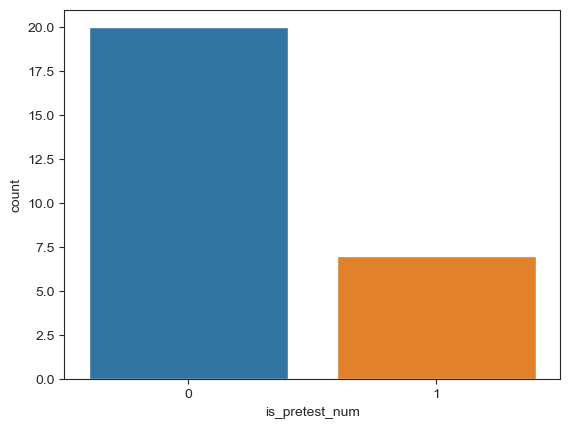

In [317]:

sns.countplot(dfs, x="is_pretest_num")


In [318]:
dfs.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'Needle holder stitch 1 median area presence [%]',
       'Needle holder stitch 2 median area presence [%]',
       'Needle holder stitch 3 median area presence [%]',
       'Forceps stitch 1 median area presence [%]',
       'Scissors stitch 1 median area presence [%]',
       'Scissors stitch 2 median area presence [%]',
       'Forceps stitch 2 median area presence [%]',
       'Scissors stitch 3 median area presence [%]',
       'Forceps stitch 3 median area presence [%]', 'is_pretest_num'],
      dtype='object', length=501)

### Replace "," with "."

In [319]:
# find the columns where its values contain single "," and digits
dfs.columns[dfs.apply(lambda x: (x.dtype is str) and (x.str.contains(",\d").any()))]
cols = []
for col in dfs.columns:
    try:
        if (dfs[col].str.contains(",\d").any()):
            # convert , to . and change the column type to float
            dfs[col] = dfs[col].str.replace(",", ".").astype(float)
            cols.append(col)
    except:
        pass
# cols

In [320]:
# dfs

In [321]:
# print name of columns containing needle holder
# dfs.columns[dfs.columns.str.contains("Needle holder")]

In [322]:
# dfs[["Needle holder stitch 1 length [m]", "Needle holder length [m]"]]

### Convert bool to the numeric


In [323]:
# get list of columns containing "annotation_annotation" in their name
cols = dfs.columns[dfs.columns.str.contains("annotation_annotation")]
# dfs["annotation_annotation_knots_are_done_right"] = dfs["annotation_annotation_knots_are_done_right"].astype(float)
# get type of the columns
dfs[cols].dtypes

for col in cols:
    uni = dfs[col].unique()
    # print(uni)
    
    if (len(list(uni))==2) and (True in uni) and (False in uni):
        dfs[col] = dfs[col].astype(float)
    else:
        print(f"skipped: {col}")



skipped: annotation_annotation
skipped: annotation_annotation_annotation
skipped: annotation_annotation_stars
skipped: annotation_annotation_annotator
skipped: annotation_annotation_updated_at
skipped: annotation_annotation_id
skipped: annotation_annotation_created_at
skipped: annotation_annotation_needle_grabbed_correctly
skipped: annotation_annotation_needle_holder_stabilized
skipped: annotation_annotation_needle_pierced_at_first_try
skipped: annotation_annotation_needle_pierced_at_right_angle
skipped: annotation_annotation_needle_rotated_correctly_on_opposite_side
skipped: annotation_annotation_needle_rotated_correctly_on_students_side
skipped: annotation_annotation_forceps_grabs_the_edge
skipped: annotation_annotation_three_knots_per_stitch
skipped: annotation_annotation_knots_are_done_right
skipped: annotation_annotation_threads_shortened_appropriately
skipped: annotation_annotation_stitch_to_wound_distance_is_correct
skipped: annotation_annotation_distance_between_stitches_is_cor

In [324]:
# assert sorted(list(dfs["annotation_annotation_knots_are_done_right"].unique())) == [0.0, 1.0]

### If there is just one stitch, put ths information into stitch 1 measurements

In [325]:
# in pre-test post-test this should not be necessary

# If column containing " stitch 1" in its name has empty values, fill them with  the values from the column with the same name but withuou " stitch 1"
# for col in dfs.columns[dfs.columns.str.contains(" stitch 0")]:
#     dfs[col] = dfs[col].fillna(dfs[col.replace(" stitch 0", "")])

In [326]:
# dfs[["Needle holder stitch 1 length [m]", "Needle holder length [m]"]]


### Remove rows and columns with lot of NaN values

In [327]:
# get numeric columns from dfs
numeric_cols = dfs.columns[dfs.apply(lambda x: x.dtype is float).any()]


# dfs[numeric_cols].isna().sum(axis=1)


C:\Users\Jirik\AppData\Local\Temp\ipykernel_5084\590114250.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  numeric_cols = dfs.columns[dfs.apply(lambda x: x.dtype is float).any()]


# Find records with more than one stitch

In [285]:
# import numpy as np
# bc = np.bincount([1,5,5,5,1,2,1])
# print(type(bc))
# bc

In [286]:
display(dfs.columns[dfs.columns.str.contains(" stitch 2")])
display(dfs.columns[dfs.columns.str.contains("Stitch 2")])
# show records with no NA values in "Stitch 3" column

dfs[dfs["Needle holder stitch 3 length [m]"].notna()]


Index(['Needle holder stitch 2 length [m]',
       'Needle holder stitch 2 visibility [s]',
       'Needle holder stitch 2 velocity', 'Needle holder stitch 2 unit',
       'Needle holder stitch 2 visibility [%]',
       'Needle holder stitch 2 area presence [%]',
       'Forceps stitch 2 length [m]', 'Forceps stitch 2 visibility [s]',
       'Forceps stitch 2 velocity', 'Forceps stitch 2 unit',
       'Forceps stitch 2 visibility [%]', 'Forceps stitch 2 area presence [%]',
       'Scissors stitch 2 length [m]', 'Scissors stitch 2 visibility [s]',
       'Scissors stitch 2 velocity', 'Scissors stitch 2 unit',
       'Scissors stitch 2 visibility [%]',
       'Scissors stitch 2 area presence [%]',
       'Needle holder bbox stitch 2 length [m]',
       'Needle holder bbox stitch 2 visibility [s]',
       'Needle holder bbox stitch 2 velocity',
       'Needle holder bbox stitch 2 unit',
       'Needle holder bbox stitch 2 visibility [%]',
       'Needle holder bbox stitch 2 area presence 

Index(['Stitch 2 duration [s]', 'Stitch 2 duration [%]'], dtype='object')

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,Needle holder stitch 1 median area presence [%],Needle holder stitch 2 median area presence [%],Needle holder stitch 3 median area presence [%],Forceps stitch 1 median area presence [%],Scissors stitch 1 median area presence [%],Scissors stitch 2 median area presence [%],Forceps stitch 2 median area presence [%],Scissors stitch 3 median area presence [%],Forceps stitch 3 median area presence [%],is_pretest_num
2147,"Große, Nina - Posttest.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 00:28:51,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-16 22:28,25.0,10.709256,1.163514,2.321917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2202,"Hilger,Anke-Posttest.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:00:11,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 12:00,25.0,8.379467,0.159525,3.232054,...,5.363985,0.000000,0.000000,23.512748,0.0,0.0,NaN,NaN,NaN,0
2215,Pre_-Test_Isabel_Linden.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:25:08,carina.bachmann@med.uni-jena.de,2024-05-24 06:46:00,2024-06-17 12:25,25.0,6.586552,1.825643,2.822289,...,3.889789,7.070707,0.494071,0.000000,0.0,0.0,0.731707,0.0,NaN,1
2216,Sarah Grimm PreTest1.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:30:34,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 12:30,25.0,9.734372,0.614122,2.451912,...,1.470588,0.140647,0.000000,0.296736,NaN,0.0,0.000000,NaN,NaN,1
2218,Schiesser_David_post_test.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:32:46,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 12:32,25.0,11.716970,1.274672,1.768750,...,0.564175,0.575816,0.000000,0.000000,0.0,0.0,5.813953,0.0,0.0,0
2222,Schiesser_David_pre_test.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:45:40,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 12:45,25.0,3.621411,0.258114,0.180562,...,13.870542,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1


In [287]:
dfs[dfs["Stitch 3 duration [s]"].notna()]

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,Needle holder stitch 1 median area presence [%],Needle holder stitch 2 median area presence [%],Needle holder stitch 3 median area presence [%],Forceps stitch 1 median area presence [%],Scissors stitch 1 median area presence [%],Scissors stitch 2 median area presence [%],Forceps stitch 2 median area presence [%],Scissors stitch 3 median area presence [%],Forceps stitch 3 median area presence [%],is_pretest_num
2147,"Große, Nina - Posttest.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 00:28:51,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-16 22:28,25.0,10.709256,1.163514,2.321917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2202,"Hilger,Anke-Posttest.mp4",http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:00:11,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 12:00,25.0,8.379467,0.159525,3.232054,...,5.363985,0.000000,0.000000,23.512748,0.0,0.0,NaN,NaN,NaN,0
2215,Pre_-Test_Isabel_Linden.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:25:08,carina.bachmann@med.uni-jena.de,2024-05-24 06:46:00,2024-06-17 12:25,25.0,6.586552,1.825643,2.822289,...,3.889789,7.070707,0.494071,0.000000,0.0,0.0,0.731707,0.0,NaN,1
2216,Sarah Grimm PreTest1.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:30:34,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 12:30,25.0,9.734372,0.614122,2.451912,...,1.470588,0.140647,0.000000,0.296736,NaN,0.0,0.000000,NaN,NaN,1
2218,Schiesser_David_post_test.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:32:46,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 12:32,25.0,11.716970,1.274672,1.768750,...,0.564175,0.575816,0.000000,0.000000,0.0,0.0,5.813953,0.0,0.0,0
2222,Schiesser_David_pre_test.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-06-17 14:45:40,mjirik@kky.zcu.cz,2024-06-03 10:53:00,2024-06-17 12:45,25.0,3.621411,0.258114,0.180562,...,13.870542,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1


In [288]:
# I have columns named in pattern "Needle holder stitch 1 length [m]", "Needle holder stitch 2 length [m]", "Needle holder stitch 3 length [m]", "Needle holder stitch 4 length [m]". I would like to split each row into several rows, each containing just one stitch length and number of the stitch.
searched_stitch_number = 2
cols = []
cols.extend(list(dfs.columns[dfs.columns.str.contains(f" stitch {searched_stitch_number}")]))
cols.extend(list(dfs.columns[dfs.columns.str.contains(f"Stitch {searched_stitch_number}")]))
# df_stitches = pd.DataFrame()
# df_stitches = dfs.melt(id_vars=["filename"], value_vars=dfs.columns[dfs.columns.str.contains(" stitch 0")], var_name="stitch", value_name="length")
# df_stitches
dfone = dfs[["filename"] + cols]
dfone = dfone.copy()
rename = {col: col.replace(f"titch {searched_stitch_number}", "titch") for col in cols }
dfone = dfone.rename(columns=rename)
dfone["stitch_id"] = searched_stitch_number



In [289]:
# dfs

# Find the correlation

In [328]:
# count numeric values in columns
# dfs.drop(["filename", "stars_auto"], axis=1).apply(lambda x: x.dtype is float).sum()
relevant_column = "is_pretest_num"
# df

In [329]:
# remove columns containing " stitch 1" in their name
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 1")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 2")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 3")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 4")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 1")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 2")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 3")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 4")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("n_stitches_by_user")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("annotation_annotation_stars")], axis=1)



In [330]:
dfs.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False)["Needle holder stitch 0 length [m]"]
dfs.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False)



is_pretest_num                               1.000000
Scissors velocity                            0.534109
duration_s_run_image_processing              0.435688
Scissors visibility [%]                      0.404564
Scissors visibility [s]                      0.387275
                                               ...   
annotation_annotation_respect_for_tissue          NaN
annotation_annotation_time_and_movements          NaN
annotation_annotation_instrument_handling         NaN
annotation_annotation_procedure_flow              NaN
annotation_annotation_i                           NaN
Name: is_pretest_num, Length: 77, dtype: float64

## Find the best columns to predict annotation_annotation_stars

In [331]:

dfs.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False)


is_pretest_num                               1.000000
Scissors velocity                            0.534109
duration_s_run_image_processing              0.435688
Scissors visibility [%]                      0.404564
Scissors visibility [s]                      0.387275
                                               ...   
annotation_annotation_respect_for_tissue          NaN
annotation_annotation_time_and_movements          NaN
annotation_annotation_instrument_handling         NaN
annotation_annotation_procedure_flow              NaN
annotation_annotation_i                           NaN
Name: is_pretest_num, Length: 77, dtype: float64

In [332]:
# get columns containing "0"
cols_with_0 = list(dfs.columns[dfs.columns.str.contains("0")])
cols_with_0

['Needle holder stitch 0 length [m]',
 'Needle holder stitch 0 visibility [s]',
 'Needle holder stitch 0 velocity',
 'Needle holder stitch 0 unit',
 'Needle holder stitch 0 visibility [%]',
 'Needle holder stitch 0 area presence [%]',
 'Forceps stitch 0 length [m]',
 'Forceps stitch 0 visibility [s]',
 'Forceps stitch 0 velocity',
 'Forceps stitch 0 unit',
 'Forceps stitch 0 visibility [%]',
 'Forceps stitch 0 area presence [%]',
 'Scissors bbox stitch 0 length [m]',
 'Scissors bbox stitch 0 visibility [s]',
 'Scissors bbox stitch 0 velocity',
 'Scissors bbox stitch 0 unit',
 'Scissors bbox stitch 0 visibility [%]',
 'Scissors bbox stitch 0 area presence [%]',
 'Left hand bbox stitch 0 length [m]',
 'Left hand bbox stitch 0 visibility [s]',
 'Left hand bbox stitch 0 velocity',
 'Left hand bbox stitch 0 unit',
 'Left hand bbox stitch 0 visibility [%]',
 'Left hand bbox stitch 0 area presence [%]',
 'Right hand bbox stitch 0 length [m]',
 'Right hand bbox stitch 0 visibility [s]',
 'Righ

In [333]:
# try to find the best columns to predict stars_auto
corr = dfs[cols_with_0 + [relevant_column]].corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False) #.head(20)
# corr = corr[corr.index != "stars_auto"] 

corr

is_pretest_num                                     1.000000
Scissors stitch 0 velocity                         0.384348
Scissors stitch 0 visibility [%]                   0.364335
Needle holder stitch 0 visibility [%]              0.285427
Scissors stitch 0 visibility [s]                   0.246081
Forceps stitch 0 visibility [%]                    0.189500
Forceps stitch 0 area presence [%]                 0.177252
Needle holder stitch 0 velocity                    0.156338
Forceps stitch 0 visibility [s]                    0.152892
Needle holder stitch 0 area presence [%]           0.147706
Needle holder stitch 0 visibility [s]              0.147539
Needle holder stitch 0 length [m]                  0.134490
Scissors stitch 0 median area presence [%]         0.114708
Forceps stitch 0 length [m]                        0.098627
Stitch 0 duration [s]                              0.093169
Forceps stitch 0 median area presence [%]          0.087712
Forceps stitch 0 velocity               

In [334]:
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# measurement_vs_annotation_separator = dfs.columns.str.contains("annotation_annotation")
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# # corr on one axis measurement, on the other annotation, just the first 10
# corr = dfs.corr(numeric_only=True).abs()
# corr





In [297]:
#select the columns containing "annotation_annotation" in their name
# measurement_vs_annotation_separator = corr.index.str.contains("annotation_annotation")
# measurement_vs_annotation_separator

In [298]:
# import seaborn as sns
# g = sns.pairplot(dfs, y_vars=corr.index[measurement_vs_annotation_separator], 
#              x_vars=corr.index[~measurement_vs_annotation_separator],
#              # x_vars=["stars_auto"]
#              # hue="n_stitches_by_user"
#              )
# g.map_lower(sns.kdeplot, levels=3, color=".2")

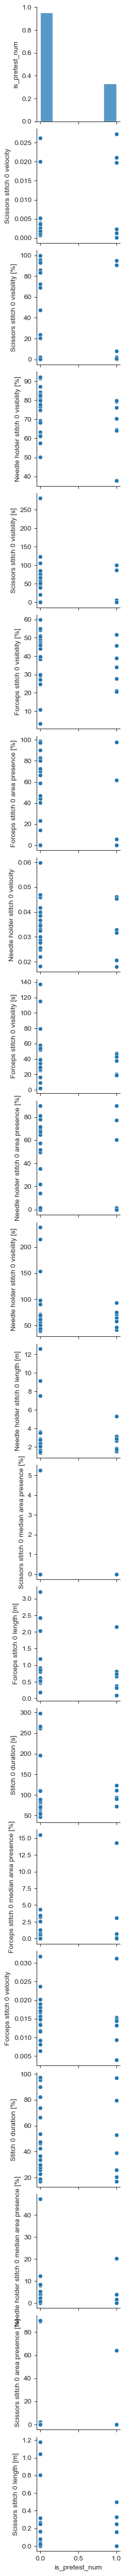

In [335]:

sns.pairplot(dfs, y_vars=corr.index,
             # x_vars=corr.index,
             x_vars=[relevant_column]
             )


In [336]:

# corr = dfs.corr(numeric_only=True)["stars_auto"].sort_values(ascending=False).head(10)
# corr


In [337]:
# columns_to_be_removed = ["stars_auto"]
# columns = list(corr.index)
# columns = [col for col in columns if col not in columns_to_be_removed]
# columns 

In [338]:
pretest_mean = dfs[dfs[relevant_column] == 1][cols_with_0 + [relevant_column]].mean()
posttest_mean = dfs[dfs[relevant_column] == 0][cols_with_0 + [relevant_column]].mean()
pretest_var = dfs[dfs[relevant_column] == 1][cols_with_0 + [relevant_column]].var()
posttest_var = dfs[dfs[relevant_column] == 0][cols_with_0 + [relevant_column]].var()






C:\Users\Jirik\AppData\Local\Temp\ipykernel_5084\2286235120.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pretest_mean = dfs[dfs[relevant_column] == 1][cols_with_0 + [relevant_column]].mean()
C:\Users\Jirik\AppData\Local\Temp\ipykernel_5084\2286235120.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  posttest_mean = dfs[dfs[relevant_column] == 0][cols_with_0 + [relevant_column]].mean()
C:\Users\Jirik\AppData\Local\Temp\ipykernel_5084\2286235120.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is depr

In [339]:
df_stats = pd.DataFrame({"pretest": pretest_mean, "posttest": posttest_mean, "pretest_var": pretest_var, "posttest_var": posttest_var})
df_stats["diff"] = df_stats["pretest"] - df_stats["posttest"]
df_stats

,pretest,posttest,pretest_var,posttest_var,diff
Needle holder stitch 0 length [m],2.722449,3.495838,1.677813,8.331560,-0.773390
Needle holder stitch 0 visibility [s],64.485714,80.813333,309.937355,3171.672329,-16.327619
Needle holder stitch 0 velocity,0.030756,0.034352,0.000137,0.000097,-0.003596
Needle holder stitch 0 visibility [%],67.388738,75.724538,211.774378,146.924514,-8.335800
Needle holder stitch 0 area presence [%],32.786135,43.847385,1693.630084,962.240041,-11.061250
...,...,...,...,...,...
Forceps curved stitch 0 length [pix],NaN,NaN,NaN,NaN,NaN
Needle holder stitch 0 median area presence [%],3.804470,5.214585,54.231018,115.633149,-1.410114
Forceps stitch 0 median area presence [%],2.628685,1.849046,27.810470,13.010369,0.779639
Scissors stitch 0 median area presence [%],0.000000,0.277008,0.000000,1.457938,-0.277008


In [340]:
! pip install ace_tools

ERROR: Could not find a version that satisfies the requirement ace_tools (from versions: none)
ERROR: No matching distribution found for ace_tools


In [341]:
import pandas as pd
import scipy.stats as stats

# Columns to compare
# cols_with_0 = list(df_stats.index)  # Replace with your actual column names
# relevant_column = "is_pretest_num"



# DataFrames for each group
pretest_df = dfs[dfs[relevant_column] == 1][["filename"] + cols_with_0]
posttest_df = dfs[dfs[relevant_column] == 0][["filename"] + cols_with_0]

# Ensure both dataframes are sorted by the same criteria to maintain pairing
pretest_df.sort_values(by="filename", inplace=True)
posttest_df.sort_values(by="filename", inplace=True)


# Perform t-tests
t_stats = []
p_values = []
col_names =[]
t_stats_less = []
p_values_less = []
col_names_less =[]
t_stats_greater = []
p_values_greater = []
col_names_greater =[]
for col in cols_with_0:
    try:
        t_stat, p_value = stats.ttest_ind(pretest_df[col], posttest_df[col], equal_var=False, alternative="two-sided")  # Assuming unequal variance
        t_stats.append(t_stat)
        p_values.append(p_value)
        
        t_stat0, p_value0 = stats.ttest_ind(pretest_df[col], posttest_df[col], equal_var=False, alternative='less')  # Assuming unequal variance
        t_stats_less.append(t_stat0)
        p_values_less.append(p_value0)
        
        t_stat2, p_value2 = stats.ttest_ind(pretest_df[col], posttest_df[col], equal_var=False, alternative="greater")  # Assuming unequal variance
        t_stats_greater.append(t_stat2)
        p_values_greater.append(p_value2)
        
        col_names.append(col)
    except:
        print(col)
        import traceback
        traceback.print_exc()

# Collect the statistics in a DataFrame
df_stats = pd.DataFrame({
    "col_name": col_names,
    "t_stat": t_stats,
    "p_value": p_values,
    "t_stat_less": t_stats_less,
    "p_value_less": p_values_less,
    "t_stat_greater": t_stats_greater,
    "p_value_greater": p_values_greater,
})

# df_stats["diff"] = df_stats["pretest_mean"] - df_stats["posttest_mean"]

# import ace_tools as tools; tools.display_dataframe_to_user(name="Statistics DataFrame", dataframe=df_stats)

df_stats

Needle holder stitch 0 unit
Forceps stitch 0 unit
Scissors bbox stitch 0 length [m]
Scissors bbox stitch 0 visibility [s]
Scissors bbox stitch 0 velocity
Scissors bbox stitch 0 unit
Scissors bbox stitch 0 visibility [%]
Scissors bbox stitch 0 area presence [%]
Left hand bbox stitch 0 length [m]
Left hand bbox stitch 0 visibility [s]
Left hand bbox stitch 0 velocity
Left hand bbox stitch 0 unit
Left hand bbox stitch 0 visibility [%]
Left hand bbox stitch 0 area presence [%]
Right hand bbox stitch 0 length [m]
Right hand bbox stitch 0 visibility [s]
Right hand bbox stitch 0 velocity
Right hand bbox stitch 0 unit
Right hand bbox stitch 0 visibility [%]
Right hand bbox stitch 0 area presence [%]
Needle holder bbox stitch 0 length [m]
Needle holder bbox stitch 0 visibility [s]
Needle holder bbox stitch 0 velocity
Needle holder bbox stitch 0 unit
Needle holder bbox stitch 0 visibility [%]
Needle holder bbox stitch 0 area presence [%]
Forceps bbox stitch 0 length [m]
Forceps bbox stitch 0 vis

C:\Users\Jirik\miniconda3\envs\jupyterlab\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
Traceback (most recent call last):
  File "C:\Users\Jirik\AppData\Local\Temp\ipykernel_5084\1475103572.py", line 31, in <module>
    t_stat, p_value = stats.ttest_ind(pretest_df[col], posttest_df[col], equal_var=False, alternative="two-sided")  # Assuming unequal variance
  File "C:\Users\Jirik\miniconda3\envs\jupyterlab\lib\site-packages\scipy\stats\_stats_py.py", line 6587, in ttest_ind
    v1 = _var(a, axis, ddof=1)
  File "C:\Users\Jirik\miniconda3\envs\jupyterlab\lib\site-packages\scipy\stats\_stats_py.py", line 1250, in _var
    var = _moment(x, 2, axis, mean=mean)
  File "C:\Users\Jirik\miniconda3\envs\jupyterlab\lib\site-packages\scipy\stats\_stats_py.py", line 1220, in _moment
    mean = a.mean(axis, keepdims=True) if mean is No

,col_name,t_stat,p_value,t_stat_less,p_value_less,t_stat_greater,p_value_greater
0,Needle holder stitch 0 length [m],-0.954682,0.349657,-0.954682,0.174828,-0.954682,0.825172
1,Needle holder stitch 0 visibility [s],-1.146368,0.262525,-1.146368,0.131262,-1.146368,0.868738
2,Needle holder stitch 0 velocity,-0.726630,0.485580,-0.726630,0.242790,-0.726630,0.757210
3,Needle holder stitch 0 visibility [%],-1.359424,0.206748,-1.359424,0.103374,-1.359424,0.896626
4,Needle holder stitch 0 area presence [%],-0.649473,0.533154,-0.649473,0.266577,-0.649473,0.733423
5,Forceps stitch 0 length [m],-0.529362,0.606255,-0.529362,0.303128,-0.529362,0.696872
6,Forceps stitch 0 visibility [s],-1.122928,0.272472,-1.122928,0.136236,-1.122928,0.863764
7,Forceps stitch 0 velocity,-0.302590,0.769957,-0.302590,0.384978,-0.302590,0.615022
8,Forceps stitch 0 visibility [%],-1.083878,0.297670,-1.083878,0.148835,-1.083878,0.851165
9,Forceps stitch 0 area presence [%],-0.783612,0.454493,-0.783612,0.227246,-0.783612,0.772754


In [342]:
pretest_df


,filename,Needle holder stitch 0 length [m],Needle holder stitch 0 visibility [s],Needle holder stitch 0 velocity,Needle holder stitch 0 unit,Needle holder stitch 0 visibility [%],Needle holder stitch 0 area presence [%],Forceps stitch 0 length [m],Forceps stitch 0 visibility [s],Forceps stitch 0 velocity,...,Forceps curved stitch 0 length [m],Forceps curved stitch 0 visibility [s],Forceps curved stitch 0 velocity,Forceps curved stitch 0 unit,Forceps curved stitch 0 visibility [%],Forceps curved stitch 0 area presence [%],Forceps curved stitch 0 length [pix],Needle holder stitch 0 median area presence [%],Forceps stitch 0 median area presence [%],Scissors stitch 0 median area presence [%]
2200,"Glöß, Monique, Pretest 1-11.10.2021.mp4",3.155002,41.933333,0.046177,m,37.777778,0.000000,0.662657,37.666667,0.015313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.707965,0.0
2201,"Hilger,Anke-Pretest1.mp4",2.653010,64.666667,0.032878,m,70.289855,60.515464,0.379417,19.533333,0.013234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.927835,3.071672,NaN
2204,Jonas Marx_Pretest.mp4,5.297252,93.466667,0.045320,m,75.989160,0.213980,2.156998,47.800000,0.031254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.640514,0.139470,0.0
2209,Lausch_Laura_Pretest.mp4,1.833348,71.266667,0.020547,m,79.185185,89.710009,0.821892,46.533333,0.014948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.205800,14.326648,0.0
2215,Pre_-Test_Isabel_Linden.mp4,1.518925,46.666667,0.020687,m,64.516129,77.285714,0.320440,20.066667,0.009389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.857143,0.000000,0.0
2216,Sarah Grimm PreTest1.mp4,2.869499,75.000000,0.031691,m,79.787234,1.777778,0.734290,43.000000,0.014388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.155039,0.0
2222,Schiesser_David_pre_test.mp4,1.730106,58.400000,0.017994,m,64.175824,0.000000,0.087466,18.733333,0.003924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0


In [343]:
posttest_df

,filename,Needle holder stitch 0 length [m],Needle holder stitch 0 visibility [s],Needle holder stitch 0 velocity,Needle holder stitch 0 unit,Needle holder stitch 0 visibility [%],Needle holder stitch 0 area presence [%],Forceps stitch 0 length [m],Forceps stitch 0 visibility [s],Forceps stitch 0 velocity,...,Forceps curved stitch 0 length [m],Forceps curved stitch 0 visibility [s],Forceps curved stitch 0 velocity,Forceps curved stitch 0 unit,Forceps curved stitch 0 visibility [%],Forceps curved stitch 0 area presence [%],Forceps curved stitch 0 length [pix],Needle holder stitch 0 median area presence [%],Forceps stitch 0 median area presence [%],Scissors stitch 0 median area presence [%]
2192,Angelique Runkel_Posttest.mp4,1.668032,58.933333,0.021944,m,76.536797,77.714932,0.538274,29.600000,0.013572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.031674,15.540541,0.000000
2193,Aryan DadashzadehKhayat_Posttest.mp4,2.488345,51.266667,0.039980,m,77.676768,77.893368,0.194788,2.066667,0.023681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520156,3.225806,0.000000
2195,Fehringer_Pascal__post_test.mp4,3.598281,71.533333,0.041703,m,87.235772,49.580615,0.188940,8.933333,0.009160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.821062,0.746269,0.000000
2197,"Gehrke,Yves - post.mp4",2.837274,65.666667,0.035097,m,91.203704,64.670051,0.576926,28.600000,0.014995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304569,2.564103,0.000000
2198,"Glöß, Monique_Posttest.mp4",2.640002,39.066667,0.059791,m,84.316547,1.535836,0.479117,25.133333,0.016709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.389078,0.000000,0.000000
2147,"Große, Nina - Posttest.mp4",2.362838,46.466667,0.040091,m,69.353234,0.143472,0.496875,16.466667,0.016664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2202,"Hilger,Anke-Posttest.mp4",1.366011,39.533333,0.025232,m,68.160920,69.477234,0.597761,29.666667,0.015615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2203,Huster__Janik_-_Post-Test.mp4,2.238078,51.533333,0.030142,m,74.685990,22.121604,0.544621,33.733333,0.011860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.129366,0.790514,0.000000
2205,Jonas Marx_Posttest.mp4,2.058316,67.866667,0.024867,m,80.793651,57.367387,0.850144,40.000000,0.018027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.831041,3.500000,0.000000
2206,Kraus_Caroline_PostTest.mp4,2.032499,90.800000,0.018159,m,81.801802,35.242291,0.469783,52.066667,0.006341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.283407,0.000000,0.000000


## Find general correlation



In [308]:
cols

Index(['annotation_annotation', 'annotation_annotation_annotation',
       'annotation_annotation_stars', 'annotation_annotation_annotator',
       'annotation_annotation_updated_at', 'annotation_annotation_id',
       'annotation_annotation_created_at',
       'annotation_annotation_needle_grabbed_correctly',
       'annotation_annotation_needle_holder_stabilized',
       'annotation_annotation_needle_pierced_at_first_try',
       'annotation_annotation_needle_pierced_at_right_angle',
       'annotation_annotation_needle_rotated_correctly_on_opposite_side',
       'annotation_annotation_needle_rotated_correctly_on_students_side',
       'annotation_annotation_forceps_grabs_the_edge',
       'annotation_annotation_three_knots_per_stitch',
       'annotation_annotation_knots_are_done_right',
       'annotation_annotation_threads_shortened_appropriately',
       'annotation_annotation_stitch_to_wound_distance_is_correct',
       'annotation_annotation_distance_between_stitches_is_correct

In [309]:
list(cols)

['annotation_annotation',
 'annotation_annotation_annotation',
 'annotation_annotation_stars',
 'annotation_annotation_annotator',
 'annotation_annotation_updated_at',
 'annotation_annotation_id',
 'annotation_annotation_created_at',
 'annotation_annotation_needle_grabbed_correctly',
 'annotation_annotation_needle_holder_stabilized',
 'annotation_annotation_needle_pierced_at_first_try',
 'annotation_annotation_needle_pierced_at_right_angle',
 'annotation_annotation_needle_rotated_correctly_on_opposite_side',
 'annotation_annotation_needle_rotated_correctly_on_students_side',
 'annotation_annotation_forceps_grabs_the_edge',
 'annotation_annotation_three_knots_per_stitch',
 'annotation_annotation_knots_are_done_right',
 'annotation_annotation_threads_shortened_appropriately',
 'annotation_annotation_stitch_to_wound_distance_is_correct',
 'annotation_annotation_distance_between_stitches_is_correct',
 'annotation_annotation_stitches_perpendicular_to_wound',
 'annotation_annotation_equal_si

In [310]:
# try to find the best columns to predict stars_auto


# corr = dfs.corr(numeric_only=True)
# numeric_cols = corr.columns[corr.columns.str.contains("annotation_annotation")]
# corr = corr[numeric_cols].abs()# .sort_values(by="annotation_annotation_stars", ascending=False).head(10)
# # keep just rows not containing "annotation_annotation" in the index
# corr = corr[~corr.index.str.contains("annotation_annotation")]
# 
# # [list(cols)].abs()# .sort_values(ascending=False).head(10)
# # corr = corr[corr.index != "stars_auto"] 
# 
# corr

,annotation_annotation_stars,annotation_annotation_id,annotation_annotation_needle_grabbed_correctly,annotation_annotation_needle_holder_stabilized,annotation_annotation_needle_pierced_at_first_try,annotation_annotation_needle_pierced_at_right_angle,annotation_annotation_needle_rotated_correctly_on_opposite_side,annotation_annotation_needle_rotated_correctly_on_students_side,annotation_annotation_forceps_grabs_the_edge,annotation_annotation_three_knots_per_stitch,...,annotation_annotation_stitch_to_wound_distance_is_correct,annotation_annotation_distance_between_stitches_is_correct,annotation_annotation_stitches_perpendicular_to_wound,annotation_annotation_equal_sized_wound_portions,annotation_annotation_no_excessive_tension,annotation_annotation_respect_for_tissue,annotation_annotation_time_and_movements,annotation_annotation_instrument_handling,annotation_annotation_procedure_flow,annotation_annotation_i
fps,0.057710,0.153598,0.028221,0.047832,0.004461,0.075943,0.063904,0.135352,0.096049,0.277577,...,0.078599,0.019391,0.042364,0.061960,0.035844,0.062472,0.103676,0.014209,0.018903,0.024017
Needle holder length [m],0.098443,0.448145,0.192226,0.426560,0.274562,0.110391,0.335171,0.060582,0.119132,0.213167,...,0.132985,0.417669,0.150048,0.085487,0.210091,0.128034,0.171296,0.000737,0.021612,0.406419
Scissors length [m],0.177458,0.357064,0.154983,0.353819,0.048558,0.054214,0.209504,0.247857,0.268644,0.171345,...,0.068310,0.283016,0.103569,0.080355,0.093489,0.079239,0.113606,0.090229,0.017431,0.303175
Forceps length [m],0.135052,0.069855,0.130507,0.128535,0.078624,0.002601,0.140940,0.047920,0.011148,0.152697,...,0.089335,0.136371,0.156424,0.148627,0.140810,0.004152,0.121292,0.047083,0.185527,0.186474
Needle holder visibility [s],0.053754,0.390411,0.029397,0.417291,0.347248,0.204690,0.418551,0.145847,0.135778,0.205036,...,0.195157,0.462943,0.139948,0.087367,0.226519,0.045817,0.016282,0.034079,0.054452,0.362151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Forceps curved stitch 0 unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Forceps curved stitch 0 visibility [%],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Forceps curved stitch 0 area presence [%],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Forceps curved stitch 0 length [pix],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
# argmax in dataframe
corr.loc[corr.idxmax()]

,annotation_annotation_stars,annotation_annotation_id,annotation_annotation_needle_grabbed_correctly,annotation_annotation_needle_holder_stabilized,annotation_annotation_needle_pierced_at_first_try,annotation_annotation_needle_pierced_at_right_angle,annotation_annotation_needle_rotated_correctly_on_opposite_side,annotation_annotation_needle_rotated_correctly_on_students_side,annotation_annotation_forceps_grabs_the_edge,annotation_annotation_three_knots_per_stitch,...,annotation_annotation_stitch_to_wound_distance_is_correct,annotation_annotation_distance_between_stitches_is_correct,annotation_annotation_stitches_perpendicular_to_wound,annotation_annotation_equal_sized_wound_portions,annotation_annotation_no_excessive_tension,annotation_annotation_respect_for_tissue,annotation_annotation_time_and_movements,annotation_annotation_instrument_handling,annotation_annotation_procedure_flow,annotation_annotation_i
stars_auto_filename,0.439247,0.358587,0.116021,0.265285,0.173085,0.027634,0.518976,0.232042,0.163634,0.228944,...,0.318510,0.528878,0.504724,0.030065,0.503140,0.195176,0.444563,0.221422,0.331492,0.355319
qr_data_pix_size_single_frame_detector_m,0.256123,0.653340,0.296248,0.144614,0.098137,0.078456,0.104221,0.076197,0.087820,0.161934,...,0.078018,0.104734,0.087205,0.076332,0.034959,0.255614,0.226383,0.087622,0.287031,0.303496
Needle holder visibility [%],0.239386,0.291410,0.372107,0.234912,0.046032,0.042951,0.059539,0.116380,0.041796,0.020844,...,0.089579,0.084495,0.092980,0.179725,0.095656,0.285344,0.245125,0.053027,0.214980,0.196798
duration_s_tracking,0.108056,0.500097,0.050354,0.553984,0.271825,0.143456,0.574142,0.225705,0.148278,0.321583,...,0.266795,0.547352,0.252592,0.092950,0.357032,0.010448,0.186541,0.001867,0.068255,0.579404
Left hand bbox velocity,0.029935,0.264554,0.051702,0.337971,0.481725,0.223894,0.256933,0.112891,0.154518,0.105128,...,0.052837,0.281176,0.279844,0.050086,0.137546,0.140670,0.246969,0.138689,0.085818,0.455671
Forceps bbox area presence [%],0.048855,0.125776,0.168777,0.199582,0.157130,0.389521,0.331541,0.097553,0.239325,0.176122,...,0.028875,0.280539,0.106030,0.053147,0.097398,0.070667,0.118561,0.099199,0.106933,0.320230
Needle holder stitch 0 visibility [s],0.154024,0.406410,0.069397,0.537785,0.210803,0.121993,0.603778,0.285789,0.090898,0.216525,...,0.325811,0.596814,0.425639,0.020319,0.535860,0.070621,0.252800,0.046621,0.163927,0.639522
Forceps velocity,0.095470,0.400256,0.250232,0.067467,0.003396,0.127097,0.162962,0.366609,0.146043,0.319588,...,0.077621,0.065271,0.087528,0.201910,0.002774,0.007691,0.092969,0.077383,0.223086,0.099852
orig frame_height,0.100997,0.004559,0.224523,0.371381,0.011659,0.306823,0.153987,0.161394,0.355169,0.279142,...,0.317366,0.339439,0.193910,0.105642,0.147740,0.176218,0.121186,0.188417,0.008719,0.314492
qr_data_size_by_scene,0.227089,0.023594,0.138313,0.238445,0.121456,0.178988,0.150613,0.096035,0.283610,0.427327,...,0.126898,0.266733,0.302964,0.091170,0.266733,0.208571,0.139683,0.207446,0.162698,0.215353


In [312]:
# dfs[["annotation_annotation_knots_are_done_right", 'filename']]

,annotation_annotation_knots_are_done_right,filename
1650,1.0,"Stresstest Aslanifard, Roja.mp4"
1652,1.0,"Stresstest Barnikol, Erik.mp4"
1653,1.0,"Stresstest Beutler, Marie-Louise.mp4"
1654,0.0,"Stresstest Brandis, Lea.MOV"
1661,1.0,Medium-Schweinefu_.mp4
1663,1.0,Medium-RPReplay_Final1634048018.mp4
1665,1.0,Good-Schweinefu__Einzelknopfnaht.mp4
1666,1.0,Good-Schmidt_Elisabeth_Einzelknotennaht_11_10_...
1667,0.0,Good-162880einzelknopf.mp4
1675,1.0,medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...


# Train predictor

In [103]:
print(corr.shape)
corr = corr.dropna()
print(corr.shape)


(20,)
(20,)


In [108]:
corr.index

Index(['is_pretest_num', 'Scissors visibility [%]',
       'Scissors stitch 0 visibility [%]', 'Scissors visibility [s]',
       'Scissors velocity', 'Stitches perpendicular score [%]',
       'Forceps stitch 0 visibility [%]', 'duration_s_run_image_processing',
       'annotation_annotation_id', 'Needle holder velocity',
       'Needle holder stitch 0 velocity', 'Scissors stitch 0 visibility [s]',
       'Forceps stitch 0 visibility [s]', 'n_stitches_by_user',
       'Needle holder length [m]', 'Scissors stitch 0 velocity',
       'Needle holder area presence [%]', 'Forceps visibility [%]',
       'Needle holder stitch 0 length [m]', 'Needle holder visibility [%]'],
      dtype='object')

In [180]:
import sklearn
# train a model to predict stars_auto
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import SVM
from sklearn.svm import SVR
#train a model to predict stars_auto

predicted_columns = ["is_pretest_num"]  # list(corr.columns[corr.columns.str.contains("is_pretest_num")])
columns = list(corr.index[~corr.index.str.contains("is_pretest_num")])
# columns = list(corr.index)
columns.append("filename")
print(predicted_columns)
print(columns)



['is_pretest_num']
['Scissors stitch 0 velocity', 'Needle holder stitch 0 area presence [%]', 'Needle holder stitch 0 velocity', 'Forceps stitch 0 velocity', 'Scissors stitch 0 visibility [%]', 'Needle holder stitch 0 visibility [%]', 'Forceps stitch 0 visibility [%]', 'Scissors stitch 0 visibility [s]', 'Forceps stitch 0 visibility [s]', 'Forceps stitch 0 area presence [%]', 'Needle holder stitch 0 length [m]', 'Needle holder stitch 0 visibility [s]', 'Scissors stitch 0 area presence [%]', 'Forceps stitch 0 length [m]', 'Stitch 0 duration [s]', 'Stitch 0 duration [%]', 'Scissors stitch 0 length [m]', 'Needle holder stitch 0 length [pix]', 'Forceps stitch 0 length [pix]', 'Scissors stitch 0 length [pix]', 'Needle holder stitch 0 median area presence [%]', 'Forceps stitch 0 median area presence [%]', 'Scissors stitch 0 median area presence [%]', 'filename']


### Remove NA values

In [181]:
# remove known problematic columns

# # remove row with index 1708
# if 1708 in dfs.index:
#     dfs = dfs.drop(1708)
# 
# if 1667 in dfs.index:
#     dfs = dfs.drop(1667)
# 
# # remove "qr_data_pix_size_single_frame_detector_m" from the columns
# if "qr_data_pix_size_single_frame_detector_m" in columns:
#     columns.remove("qr_data_pix_size_single_frame_detector_m")

# dfs[cols].isna().sum()


In [182]:

# count NA values in columns

dfs[columns].isna().sum().sort_values(ascending=False)


Scissors stitch 0 length [pix]                     29
Forceps stitch 0 length [pix]                      29
Needle holder stitch 0 length [pix]                29
Scissors stitch 0 median area presence [%]         27
Forceps stitch 0 median area presence [%]          27
Needle holder stitch 0 median area presence [%]    27
Scissors stitch 0 length [m]                        6
Scissors stitch 0 velocity                          5
Needle holder stitch 0 length [m]                   5
Forceps stitch 0 length [m]                         5
Scissors stitch 0 area presence [%]                 5
Scissors stitch 0 visibility [s]                    5
Scissors stitch 0 visibility [%]                    5
Needle holder stitch 0 visibility [s]               4
Needle holder stitch 0 area presence [%]            4
Forceps stitch 0 area presence [%]                  4
Stitch 0 duration [s]                               4
Stitch 0 duration [%]                               4
Forceps stitch 0 visibility 

In [183]:

dfs[cols].isna().sum(axis=1).sort_values(ascending=False)


2115    1
2123    1
2179    1
2177    1
2166    1
2165    1
2163    1
2162    1
2159    1
2158    1
2157    1
2156    1
2151    1
2148    1
2147    1
2144    1
2143    1
2141    1
2140    1
2138    1
2136    1
2134    1
2133    1
2131    1
2129    1
2128    1
2127    1
2126    1
2124    1
2180    1
dtype: int64

In [184]:
# fill 0 instead of None
dfs[columns] = dfs[columns].fillna(0)

In [186]:

results = {}
for predicted_column in predicted_columns:
# if True:
#     predicted_column = "annotation_annotation_stars"
    cols = columns.copy()
    cols.append(predicted_column)

    dfsx = dfs[cols].copy()
    l1 = len(dfsx)
    dfsx = dfsx.dropna()
    l2 = len(dfsx)
    assert l1 == l2, "There are still NA values in the data"
    X = dfsx[columns].drop("filename", axis=1)
    # X = X.drop(predicted_column, axis=1)
    y = dfsx[predicted_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = SVR()
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    # 
    # X
    # from sklearn.neural_network import MLPClassifier
    # # X = [[0., 0.], [1., 1.]]
    # # y = [0, 1]
    # clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
    #                     hidden_layer_sizes=(5, 2), random_state=1)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    results[predicted_column] = {"score": clf.score(X_test, y_test), "model": clf}
    print(predicted_column, clf.score(X_test, y_test))



is_pretest_num 0.012739961154499047


In [115]:
X

,Scissors visibility [%],Scissors stitch 0 visibility [%],Scissors visibility [s],Scissors velocity,Stitches perpendicular score [%],Forceps stitch 0 visibility [%],duration_s_run_image_processing,annotation_annotation_id,Needle holder velocity,Needle holder stitch 0 velocity,Scissors stitch 0 visibility [s],Forceps stitch 0 visibility [s],n_stitches_by_user,Needle holder length [m],Scissors stitch 0 velocity,Needle holder area presence [%],Forceps visibility [%],Needle holder stitch 0 length [m],Needle holder visibility [%]
2115,96.783560,94.036185,288.866667,0.003695,66.666667,45.968282,7.453282,229.0,0.046078,0.045985,280.666667,137.200000,0.0,12.666088,0.003659,50.643177,46.102301,12.619390,79.874916
2123,5.222798,8.067542,16.800000,0.021788,66.666667,28.236398,6.467052,232.0,0.022032,0.020763,5.733333,20.066667,4.0,6.586552,0.019818,25.345770,36.663212,1.496144,64.435233
2124,47.943560,13.359352,106.466667,0.002969,33.333333,35.544881,22.554897,231.0,0.029098,0.036781,29.666667,78.933333,0.0,8.224077,0.007957,0.287563,35.845092,6.744954,83.518463
2126,0.340368,0.340368,0.666667,0.020008,66.666667,29.441797,13.375598,227.0,0.027614,0.027630,0.666667,57.666667,0.0,3.493096,0.020008,61.163735,29.441797,3.492798,50.306331
2129,2.330623,2.330623,2.866667,0.027332,0.000000,38.861789,6.158983,212.0,0.044734,0.045320,2.866667,47.800000,0.0,5.308360,0.027332,0.000000,38.861789,5.297252,77.181572
2133,96.915960,96.915960,83.800000,0.003581,40.000000,29.067078,9.851187,223.0,0.051724,0.051724,83.800000,25.133333,0.0,3.262977,0.003581,0.000000,29.067078,3.262977,60.755590
2136,31.216931,2.183908,59.000000,0.002577,100.000000,45.747126,10.278608,213.0,0.024679,0.025564,1.266667,26.533333,0.0,4.647988,0.026218,37.827537,35.555556,1.459292,74.038801
2140,14.704492,24.047619,41.466667,0.002957,0.000000,47.619048,12.966902,225.0,0.032891,0.024867,20.200000,40.000000,0.0,9.152938,0.001658,26.798445,38.652482,2.058316,72.955083
2141,0.108108,0.148148,0.200000,0.000301,50.000000,51.703704,8.476551,207.0,0.023985,0.020547,0.133333,46.533333,0.0,4.359753,0.000021,53.057294,43.171171,1.833348,74.846847
2148,0.842105,0.921986,2.400000,0.041240,0.000000,45.744681,6.749438,218.0,0.035146,0.031691,0.866667,43.000000,0.0,9.734372,0.021139,0.120482,45.871345,2.869499,77.660819


## Score

In [116]:
clf.score(X_test, y_test)

0.5

In [30]:
clf.score(X_train, y_train)

NameError: name 'clf' is not defined

## Check the předictions

In [149]:
y_test

922    2
928    0
939    0
924    2
Name: stars_auto, dtype: int32

In [150]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 0, 0])

In [113]:
clf.predict(X_train)


array([0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1])

In [114]:
y_train

933    1
945    0
926    2
942    2
944    2
947    2
925    2
934    0
948    0
927    2
940    0
931    1
938    1
943    0
930    1
Name: stars_auto, dtype: int32

In [117]:

# sns.histplot(dfs, x="n_stitches_by_user")
dfs.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'Scissors stitch 0 area presence [%]',
       'Needle holder stitch 0 length [pix]', 'Forceps stitch 0 length [pix]',
       'Scissors stitch 0 length [pix]',
       'Needle holder bbox stitch 0 length [pix]',
       'Forceps bbox stitch 0 length [pix]',
       'Scissors bbox stitch 0 length [pix]',
       'Left hand bbox stitch 0 length [pix]',
       'Right hand bbox stitch 0 length [pix]', 'stars_auto'],
      dtype='object', length=218)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

816    2
842    0
840    0
822    2
Name: stars_auto, dtype: int32

<AxesSubplot: xlabel='n_stitches_by_user', ylabel='Count'>

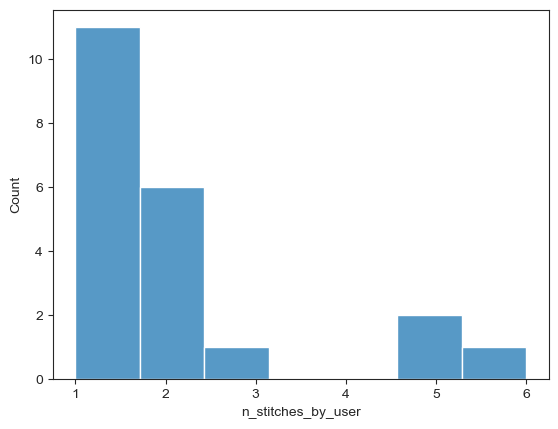

In [146]:
sns.histplot(dfs, x="n_stitches_by_user", 
             # hue="stars_auto"
             )